In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

# caclulate mean absolute error in each
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
import seaborn as sns
import missingno as msn



In [2]:
df = pd.read_excel("C:/Volve production data.xlsx")
df.head() 

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


<Axes: >

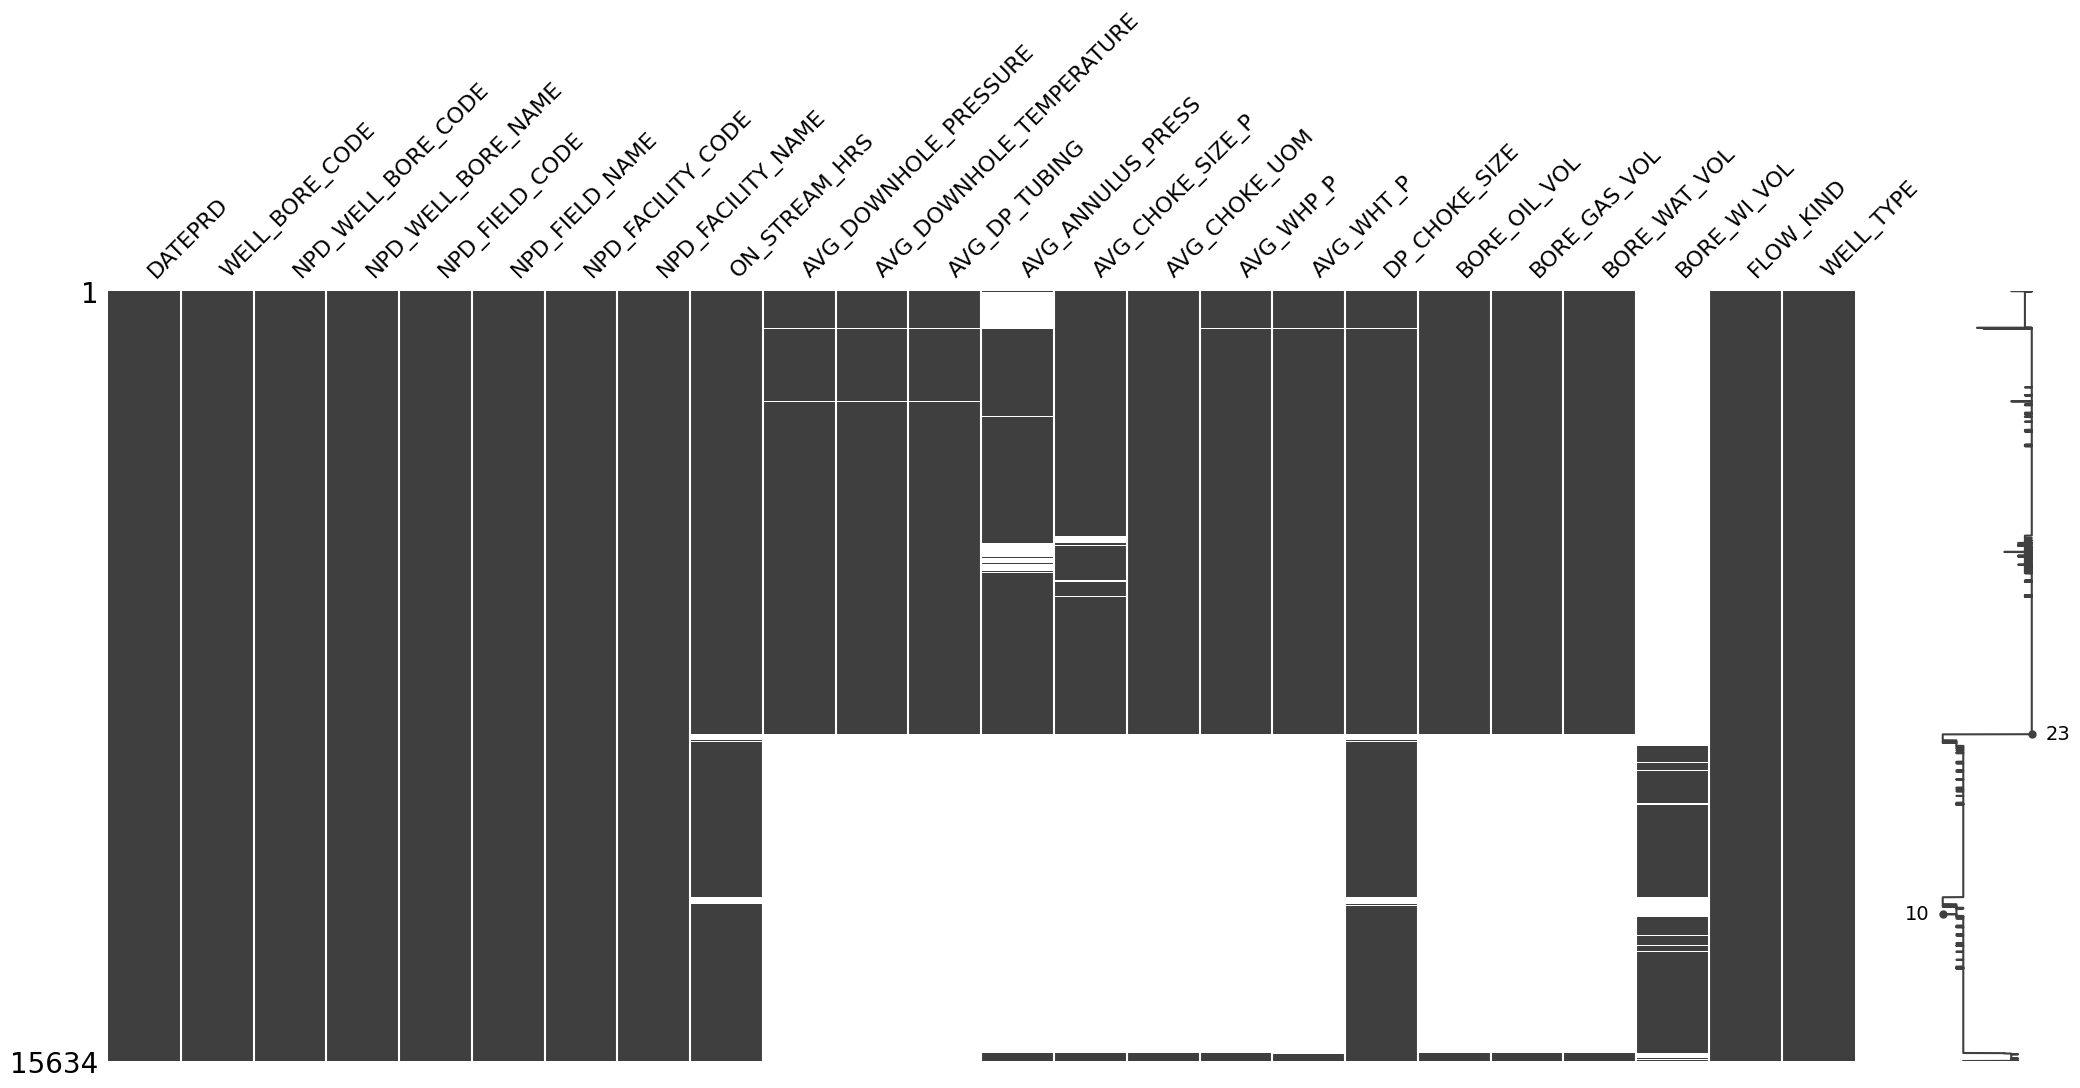

In [3]:
msn.matrix(df)

In [4]:
df.isna().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

<Axes: title={'center': 'Oil production for all wells'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

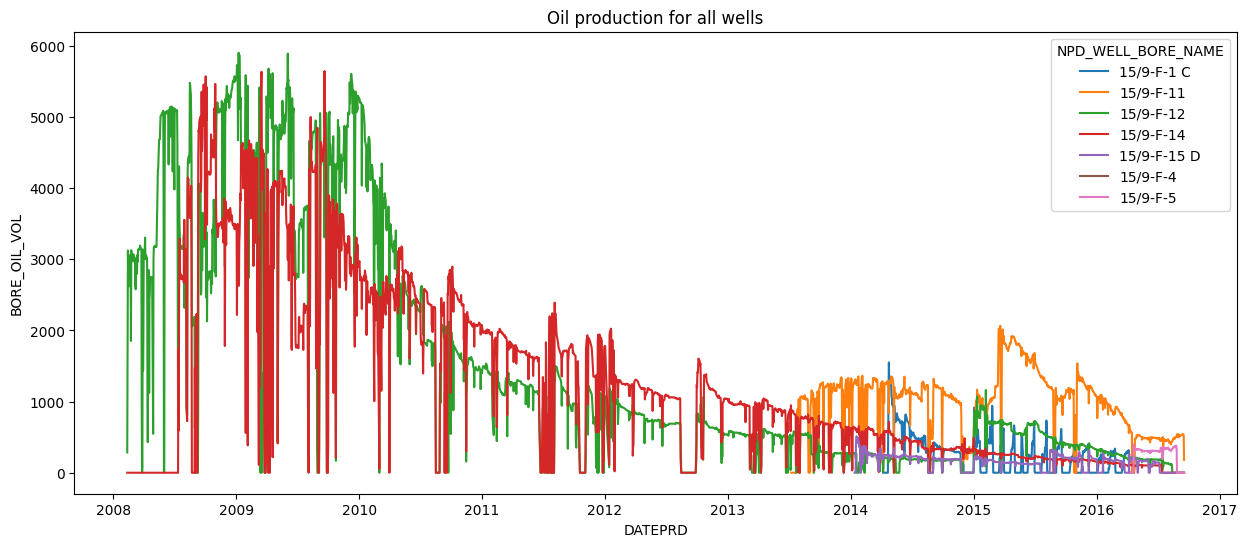

In [5]:
#Grafico de aceite por pozo
plt.figure(figsize=(15,6))
plt.title("Oil production for all wells")
sns.lineplot(data = df ,x ="DATEPRD" , y = "BORE_OIL_VOL" ,hue ="NPD_WELL_BORE_NAME",)

<function matplotlib.pyplot.show(close=None, block=None)>

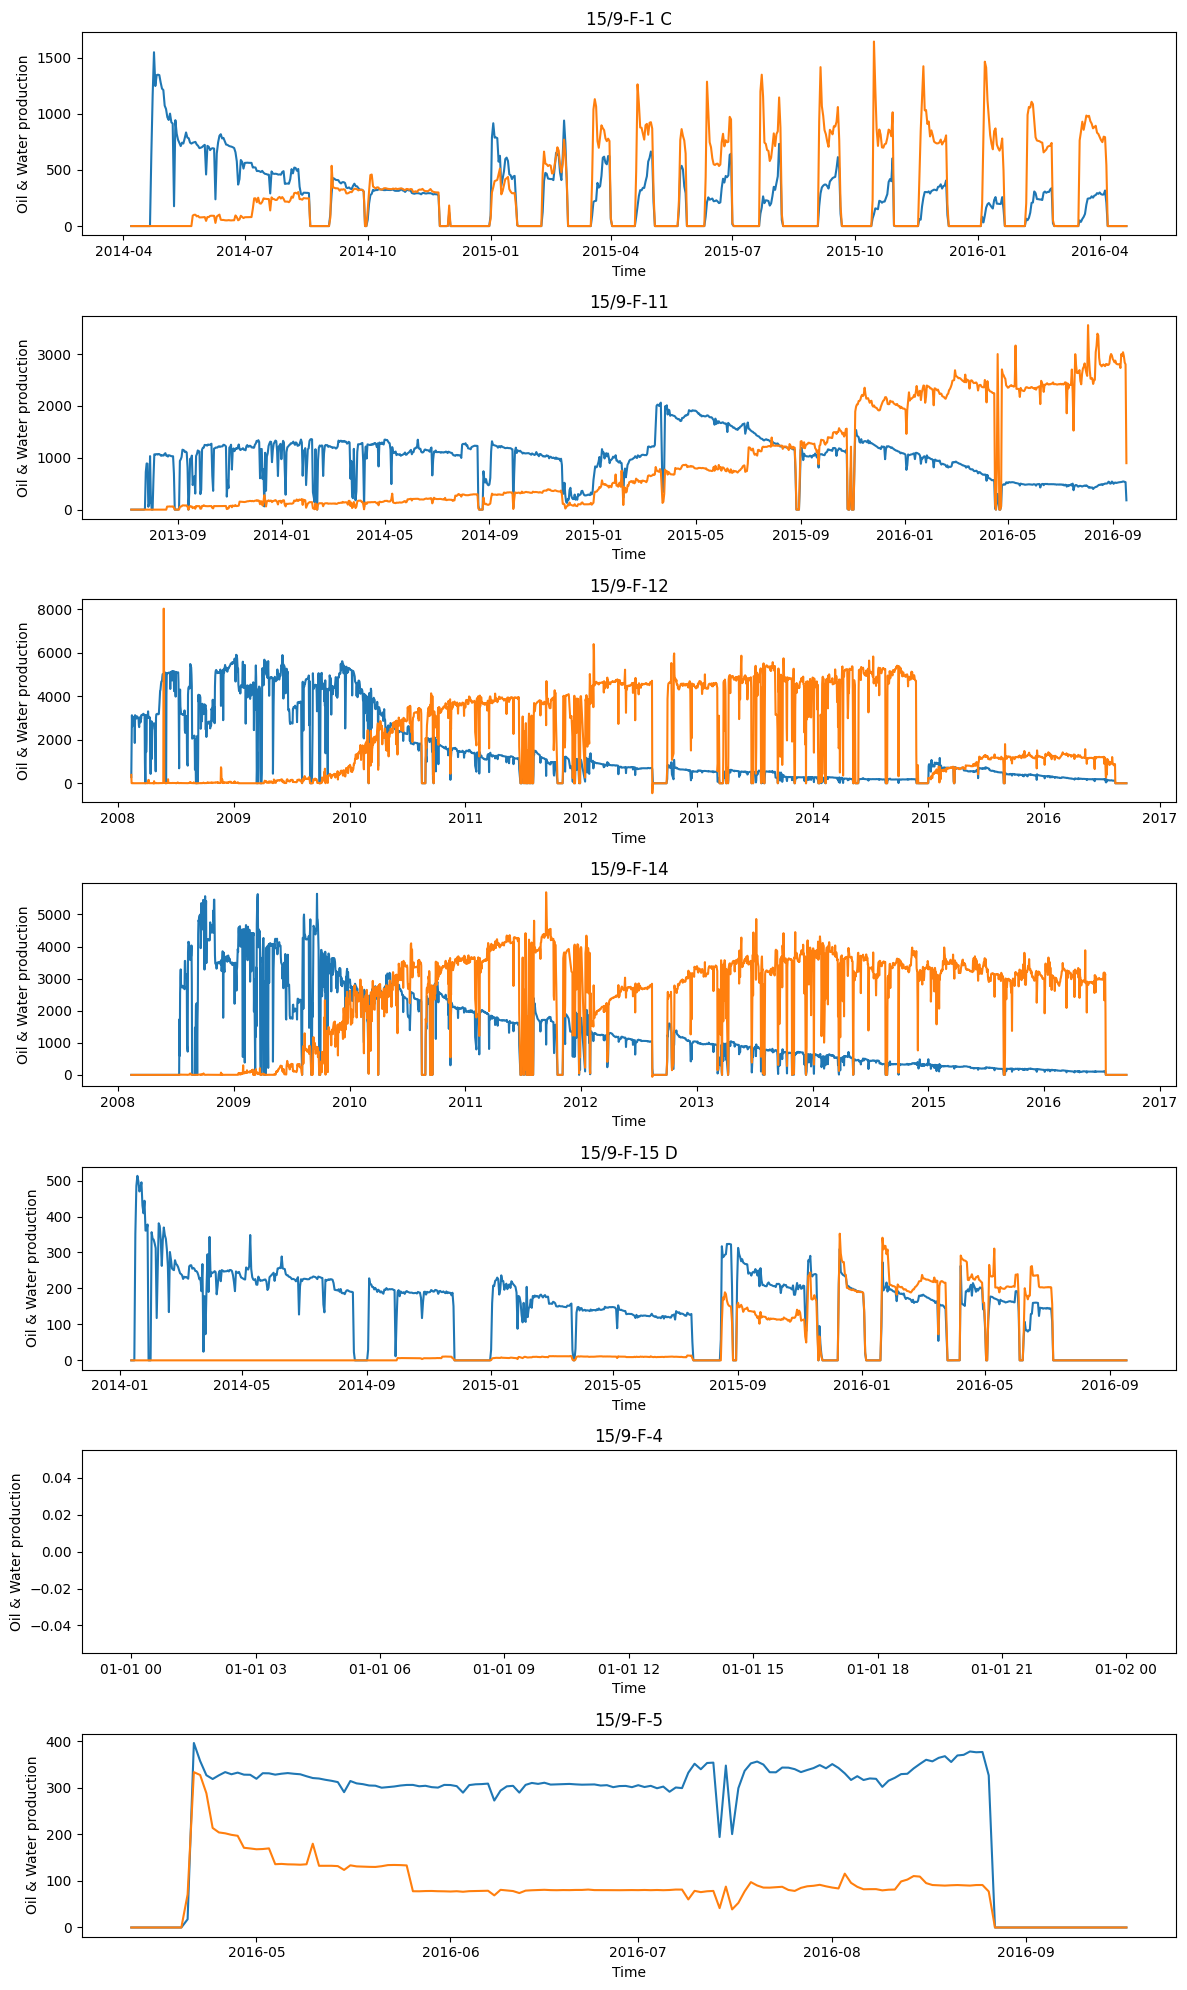

In [6]:
# Grafico de gasto de aceite y agua
wells = df["NPD_WELL_BORE_NAME"].unique()
plt.figure(figsize=(12,20))
for i, well in enumerate(wells):
    d = df[df["NPD_WELL_BORE_NAME"]==well]
    plt.subplot(len(wells),1,i+1)
    plt.plot(d["DATEPRD"],d["BORE_OIL_VOL"])
    plt.plot(d["DATEPRD"],d["BORE_WAT_VOL"])
    plt.title(well)
    plt.xlabel("Time")
    plt.ylabel("Oil & Water production")
    
plt.tight_layout()
plt.show

In [7]:
df_ml = df[df["WELL_TYPE"]== "OP"]
df_ml.shape


(9143, 24)

In [8]:
df_ml.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

<Axes: >

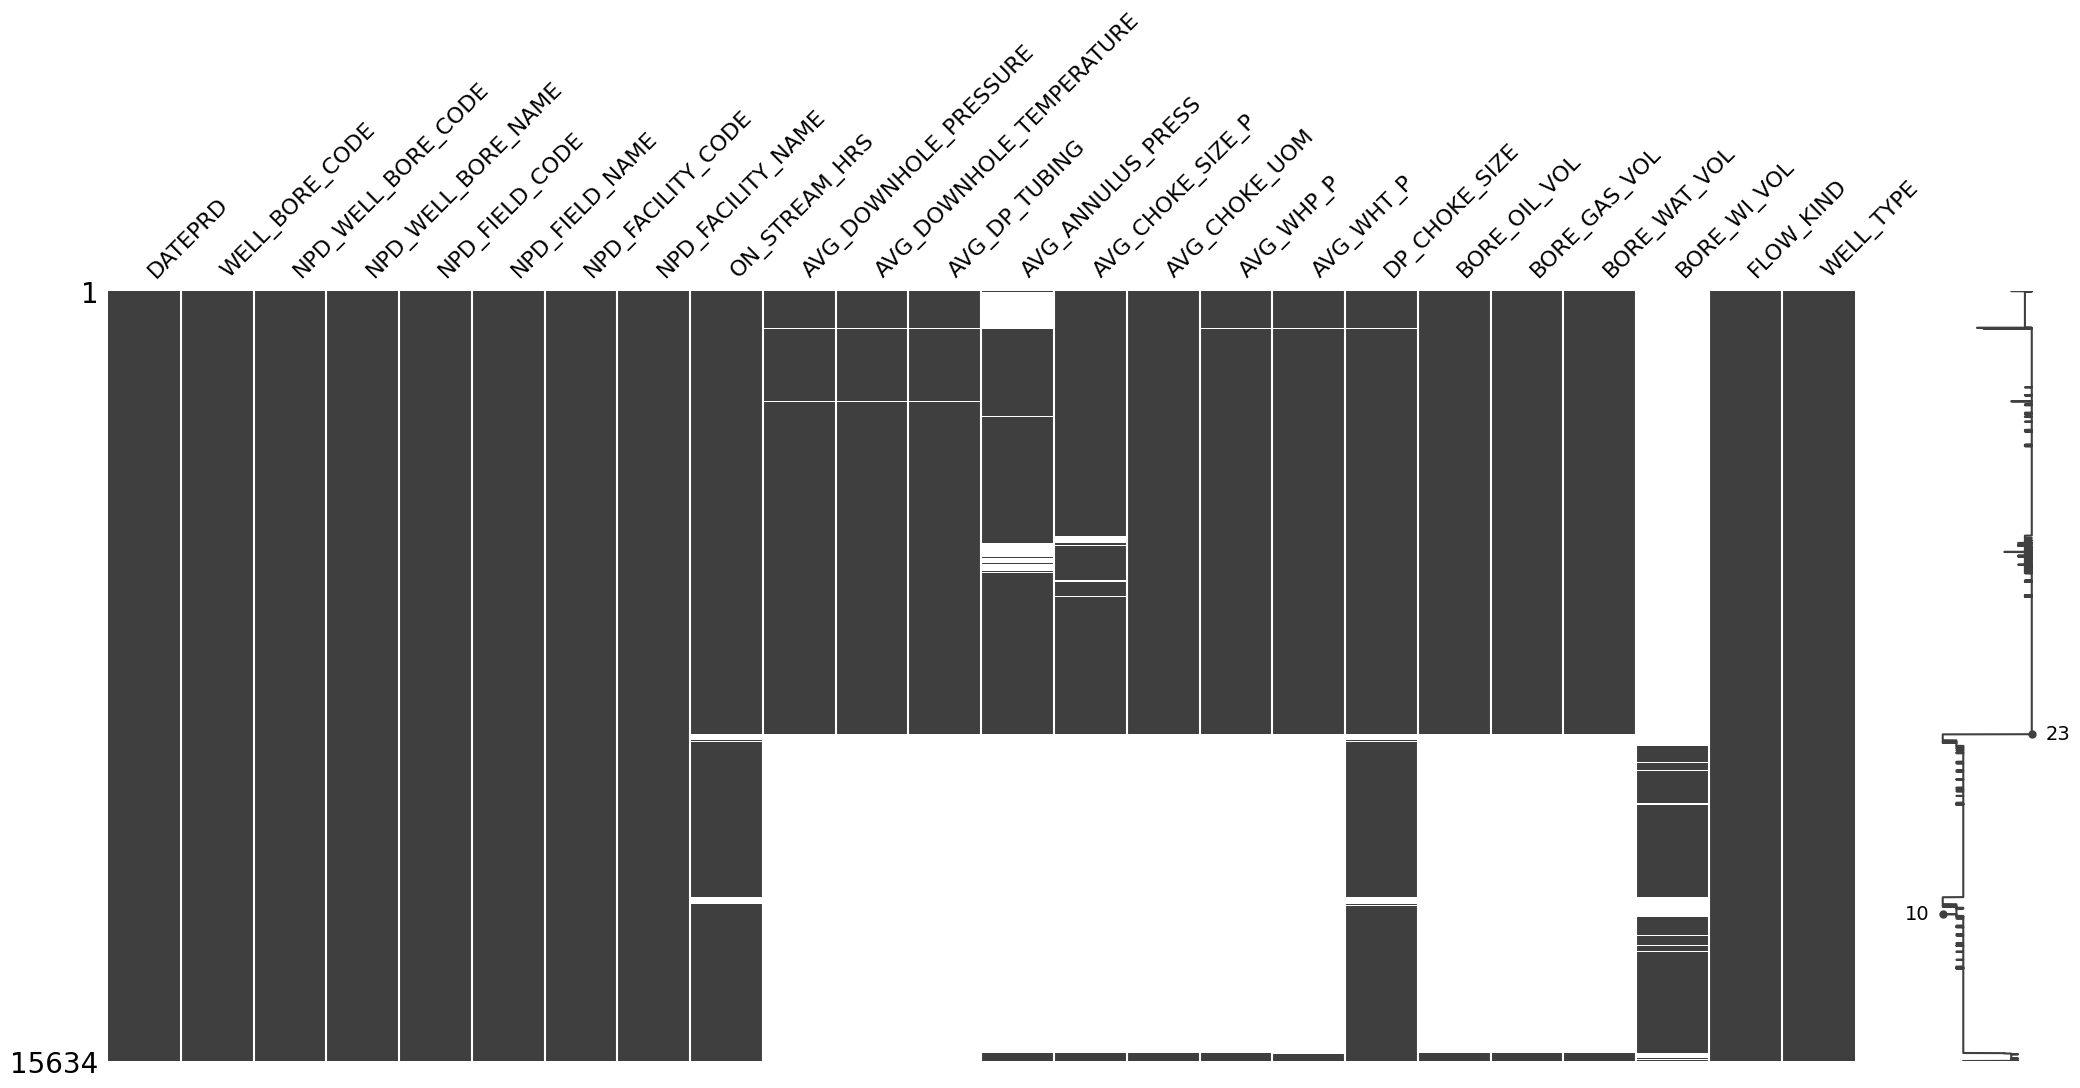

In [9]:
msn.matrix(df)

In [10]:
df_ml = df_ml[["DATEPRD","NPD_WELL_BORE_NAME","ON_STREAM_HRS","AVG_DOWNHOLE_PRESSURE",
            "AVG_DOWNHOLE_TEMPERATURE","AVG_DP_TUBING","BORE_OIL_VOL",
           "BORE_GAS_VOL","BORE_WAT_VOL","AVG_WHP_P","AVG_WHT_P","DP_CHOKE_SIZE"
           ]]

<Axes: >

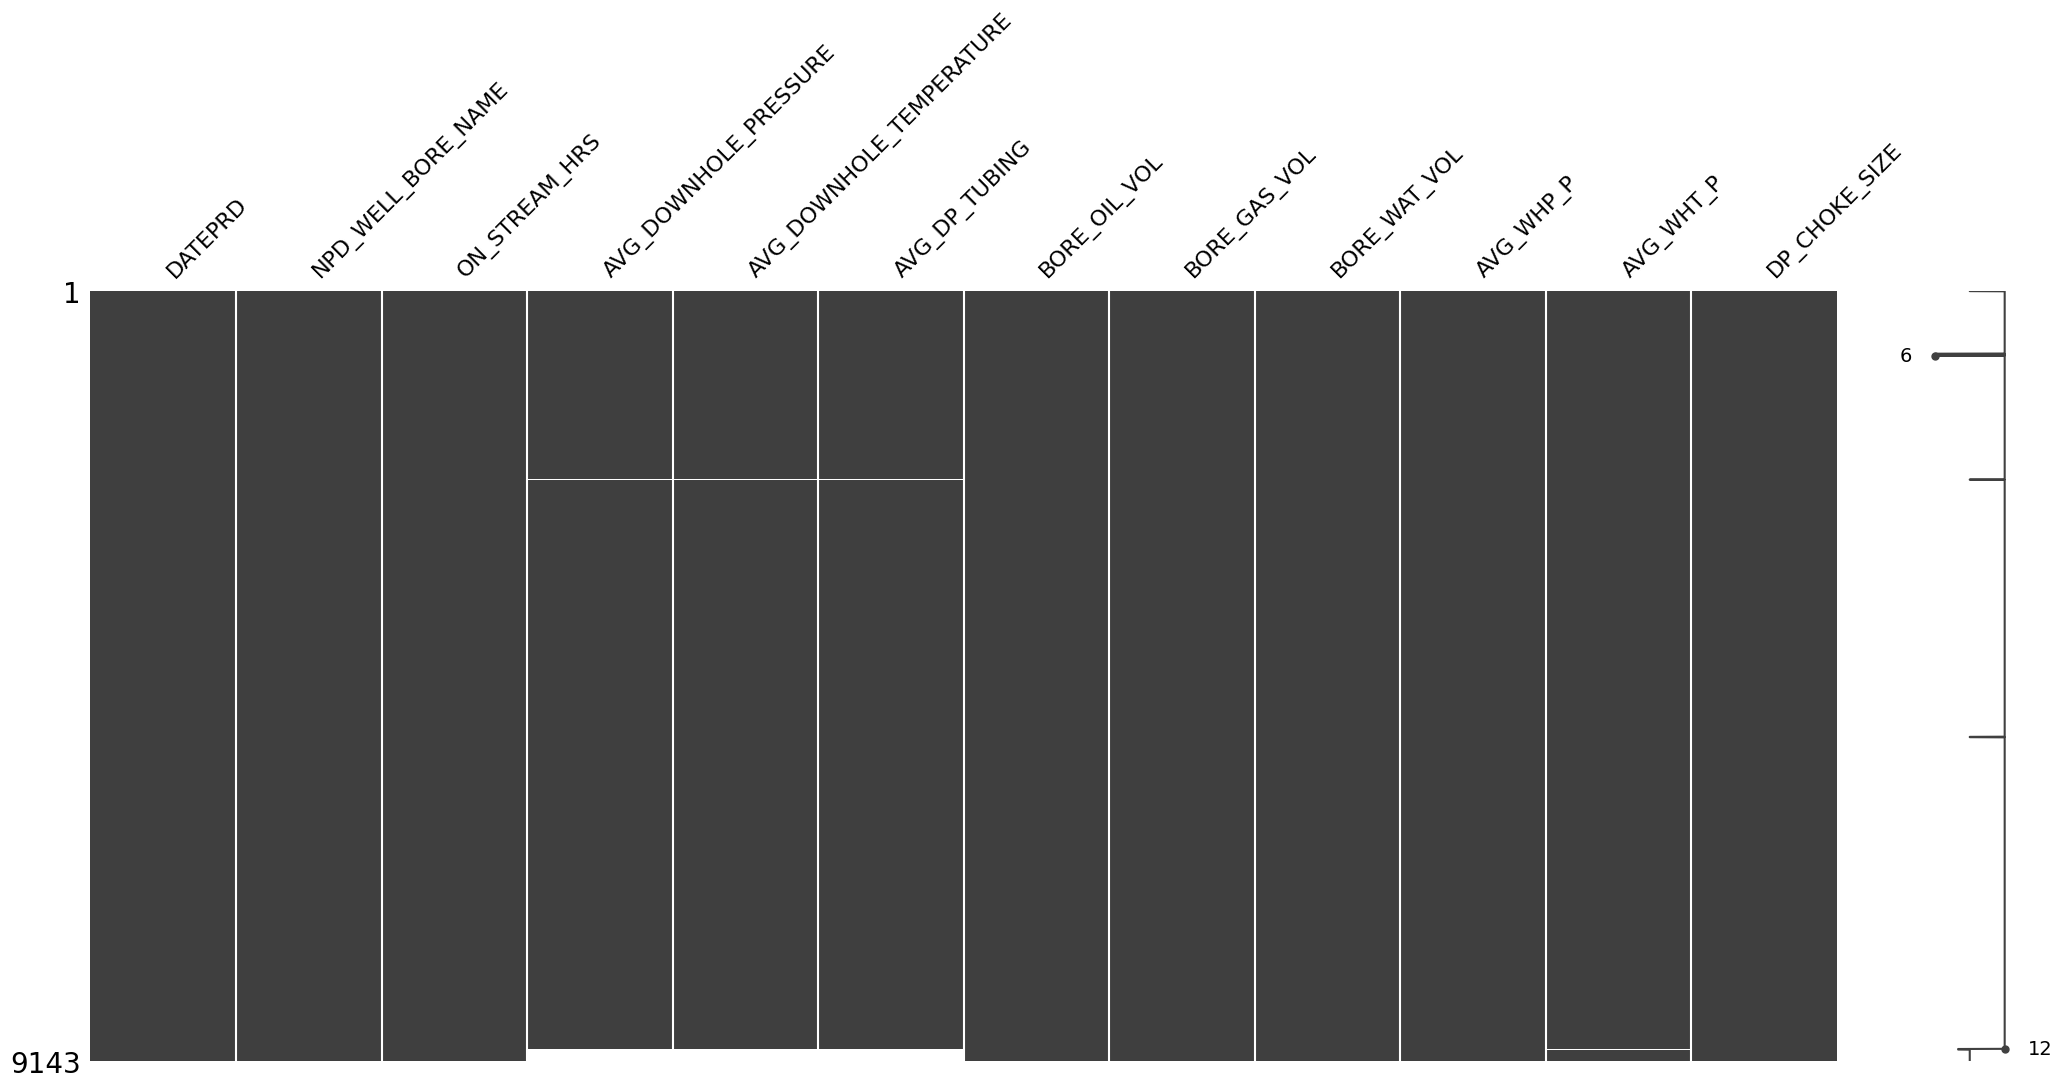

In [11]:
msn.matrix(df_ml)

In [12]:
df_ml.rename(columns={
    'DATEPRD': 'date',
    'NPD_WELL_BORE_NAME': 'well_name',
    'ON_STREAM_HRS': 'prod_hrs',
    'AVG_DOWNHOLE_PRESSURE': 'bhp',
    'AVG_DOWNHOLE_TEMPERATURE': 'bht',
    'AVG_DP_TUBING': 'dp_tubing',
    'AVG_WHP_P': 'tht',
    'AVG_WHT_P': 'thp',
    'DP_CHOKE_SIZE': 'choke_size_percentage',
    'BORE_OIL_VOL': 'oil_vol',
    'BORE_GAS_VOL': 'gas_vol',
    'BORE_WAT_VOL': 'water_vol',    
}, inplace=True)

In [13]:
df_ml.head()

,date,well_name,prod_hrs,bhp,bht,dp_tubing,oil_vol,gas_vol,water_vol,tht,thp,choke_size_percentage
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.00000,0.00000,0.00000
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.00000,0.00000,0.00000
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.00000,0.00000,0.00000
4,2014-04-11,15/9-F-1 C,0.0,310.37614,96.87589,277.27826,0.0,0.0,0.0,33.09788,10.47992,33.07195
5,2014-04-12,15/9-F-1 C,0.0,303.50078,96.92339,281.44744,0.0,0.0,0.0,22.05334,8.70429,22.05334


In [14]:
#Adecuación dataset
df_ml = df_ml.dropna()
df_ml["oil_rate"] = (df_ml["oil_vol"] * 24 )  / df_ml["prod_hrs"]
df_ml["gas_rate"] = (df_ml["gas_vol"] * 24 )  / df_ml["prod_hrs"]
df_ml["water_rate"] = (df_ml["water_vol"] * 24 )  / df_ml["prod_hrs"]
df_ml["gor"] = df_ml["gas_rate"] / df_ml["oil_rate"]
df_ml["wc"] = df_ml["water_rate"] / (df_ml["water_rate"] + df_ml["oil_rate"])
df_ml.drop(["oil_vol","gas_vol","water_vol"],axis=1,inplace=True)
df_ml.head()

,date,well_name,prod_hrs,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_rate,gas_rate,water_rate,gor,wc
4,2014-04-11,15/9-F-1 C,0.0,310.37614,96.87589,277.27826,33.09788,10.47992,33.07195,NaN,NaN,NaN,NaN,NaN
5,2014-04-12,15/9-F-1 C,0.0,303.50078,96.92339,281.44744,22.05334,8.70429,22.05334,NaN,NaN,NaN,NaN,NaN
6,2014-04-13,15/9-F-1 C,0.0,303.53481,96.95885,276.03200,27.50281,9.42315,16.16326,NaN,NaN,NaN,NaN,NaN
7,2014-04-14,15/9-F-1 C,0.0,303.78228,96.96873,282.78676,20.99552,8.13137,20.73712,NaN,NaN,NaN,NaN,NaN
8,2014-04-15,15/9-F-1 C,0.0,303.85821,97.02136,289.94067,13.91754,8.49833,12.18153,NaN,NaN,NaN,NaN,NaN


In [15]:
df_ml= df_ml.dropna() 
df_ml.isna().sum() , df_ml.shape

(date                     0
 well_name                0
 prod_hrs                 0
 bhp                      0
 bht                      0
 dp_tubing                0
 tht                      0
 thp                      0
 choke_size_percentage    0
 oil_rate                 0
 gas_rate                 0
 water_rate               0
 gor                      0
 wc                       0
 dtype: int64,
 (7862, 14))

In [16]:
df_ml.head()

,date,well_name,prod_hrs,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_rate,gas_rate,water_rate,gor,wc
15,2014-04-22,15/9-F-1 C,24.0,289.421362,106.353209,182.059312,107.362050,37.939251,78.935409,631.47,90439.09,0.0,143.219931,0.0
16,2014-04-23,15/9-F-1 C,24.0,270.239793,107.643779,171.052782,99.187011,60.756579,70.627109,1166.46,165720.39,0.0,142.071215,0.0
17,2014-04-24,15/9-F-1 C,24.0,262.842747,107.869234,168.241977,94.600770,63.046800,66.049151,1549.81,221707.31,0.0,143.054510,0.0
18,2014-04-25,15/9-F-1 C,24.0,255.526995,107.971137,165.538903,89.988092,64.547229,61.405386,1248.70,178063.52,0.0,142.599119,0.0
19,2014-04-26,15/9-F-1 C,24.0,247.199052,108.052030,162.422242,84.776810,65.723694,56.147906,1345.78,192602.19,0.0,143.115658,0.0


In [17]:
pd.unique(df_ml['well_name'])

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D'],
      dtype=object)

In [18]:
df_ml = df_ml[df_ml['bhp']>0]
df_ml["num_of_days"]= (pd.to_datetime(df_ml["date"]) - df["DATEPRD"].min()).dt.days

In [19]:
df_ml.head()


,date,well_name,prod_hrs,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_rate,gas_rate,water_rate,gor,wc,num_of_days
15,2014-04-22,15/9-F-1 C,24.0,289.421362,106.353209,182.059312,107.362050,37.939251,78.935409,631.47,90439.09,0.0,143.219931,0.0,2425
16,2014-04-23,15/9-F-1 C,24.0,270.239793,107.643779,171.052782,99.187011,60.756579,70.627109,1166.46,165720.39,0.0,142.071215,0.0,2426
17,2014-04-24,15/9-F-1 C,24.0,262.842747,107.869234,168.241977,94.600770,63.046800,66.049151,1549.81,221707.31,0.0,143.054510,0.0,2427
18,2014-04-25,15/9-F-1 C,24.0,255.526995,107.971137,165.538903,89.988092,64.547229,61.405386,1248.70,178063.52,0.0,142.599119,0.0,2428
19,2014-04-26,15/9-F-1 C,24.0,247.199052,108.052030,162.422242,84.776810,65.723694,56.147906,1345.78,192602.19,0.0,143.115658,0.0,2429


In [20]:
df_ml = df_ml[df_ml['water_rate']>0]

In [21]:
df_ml.describe()

,date,prod_hrs,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_rate,gas_rate,water_rate,gor,wc,num_of_days
count,5566,5566.000000,5566.000000,5566.000000,5566.000000,5566.000000,5566.000000,5566.000000,5566.000000,5.566000e+03,5566.000000,5566.000000,5566.000000,5566.000000
mean,2013-02-09 05:50:17.894358528,23.132887,241.594195,104.397304,193.833511,47.764517,75.494869,18.608521,1549.805094,2.268131e+05,1694.909254,150.878920,0.485319,1988.243263
min,2008-02-12 00:00:00,0.250000,49.450440,20.959721,7.219360,0.000000,7.036688,0.194397,2.520000,5.015800e+02,0.010000,40.334374,0.000003,164.000000
25%,2010-06-16 06:00:00,24.000000,223.780962,102.108715,171.489155,31.866893,69.612541,3.336808,331.058270,5.102944e+04,159.790454,144.643441,0.115871,1019.250000
50%,2014-01-12 00:00:00,24.000000,243.620610,105.833105,190.816438,40.503707,81.260264,11.227017,1077.484135,1.660353e+05,1450.662170,150.114542,0.549784,2325.000000
75%,2015-05-17 00:00:00,24.000000,258.142607,106.457292,214.402501,60.646367,87.556848,28.451789,2340.996822,3.354283e+05,3165.835000,155.697699,0.781715,2815.000000
max,2016-09-17 00:00:00,25.000000,308.055940,108.502178,259.087354,120.888576,93.509584,106.035140,7190.177593,1.276802e+06,11383.540000,1110.185309,0.973024,3304.000000
std,NaN,3.306591,21.512171,3.914217,26.032713,19.942967,16.872140,18.187785,1465.626502,2.077600e+05,1502.986223,18.359996,0.333972,957.712466


<function matplotlib.pyplot.show(close=None, block=None)>

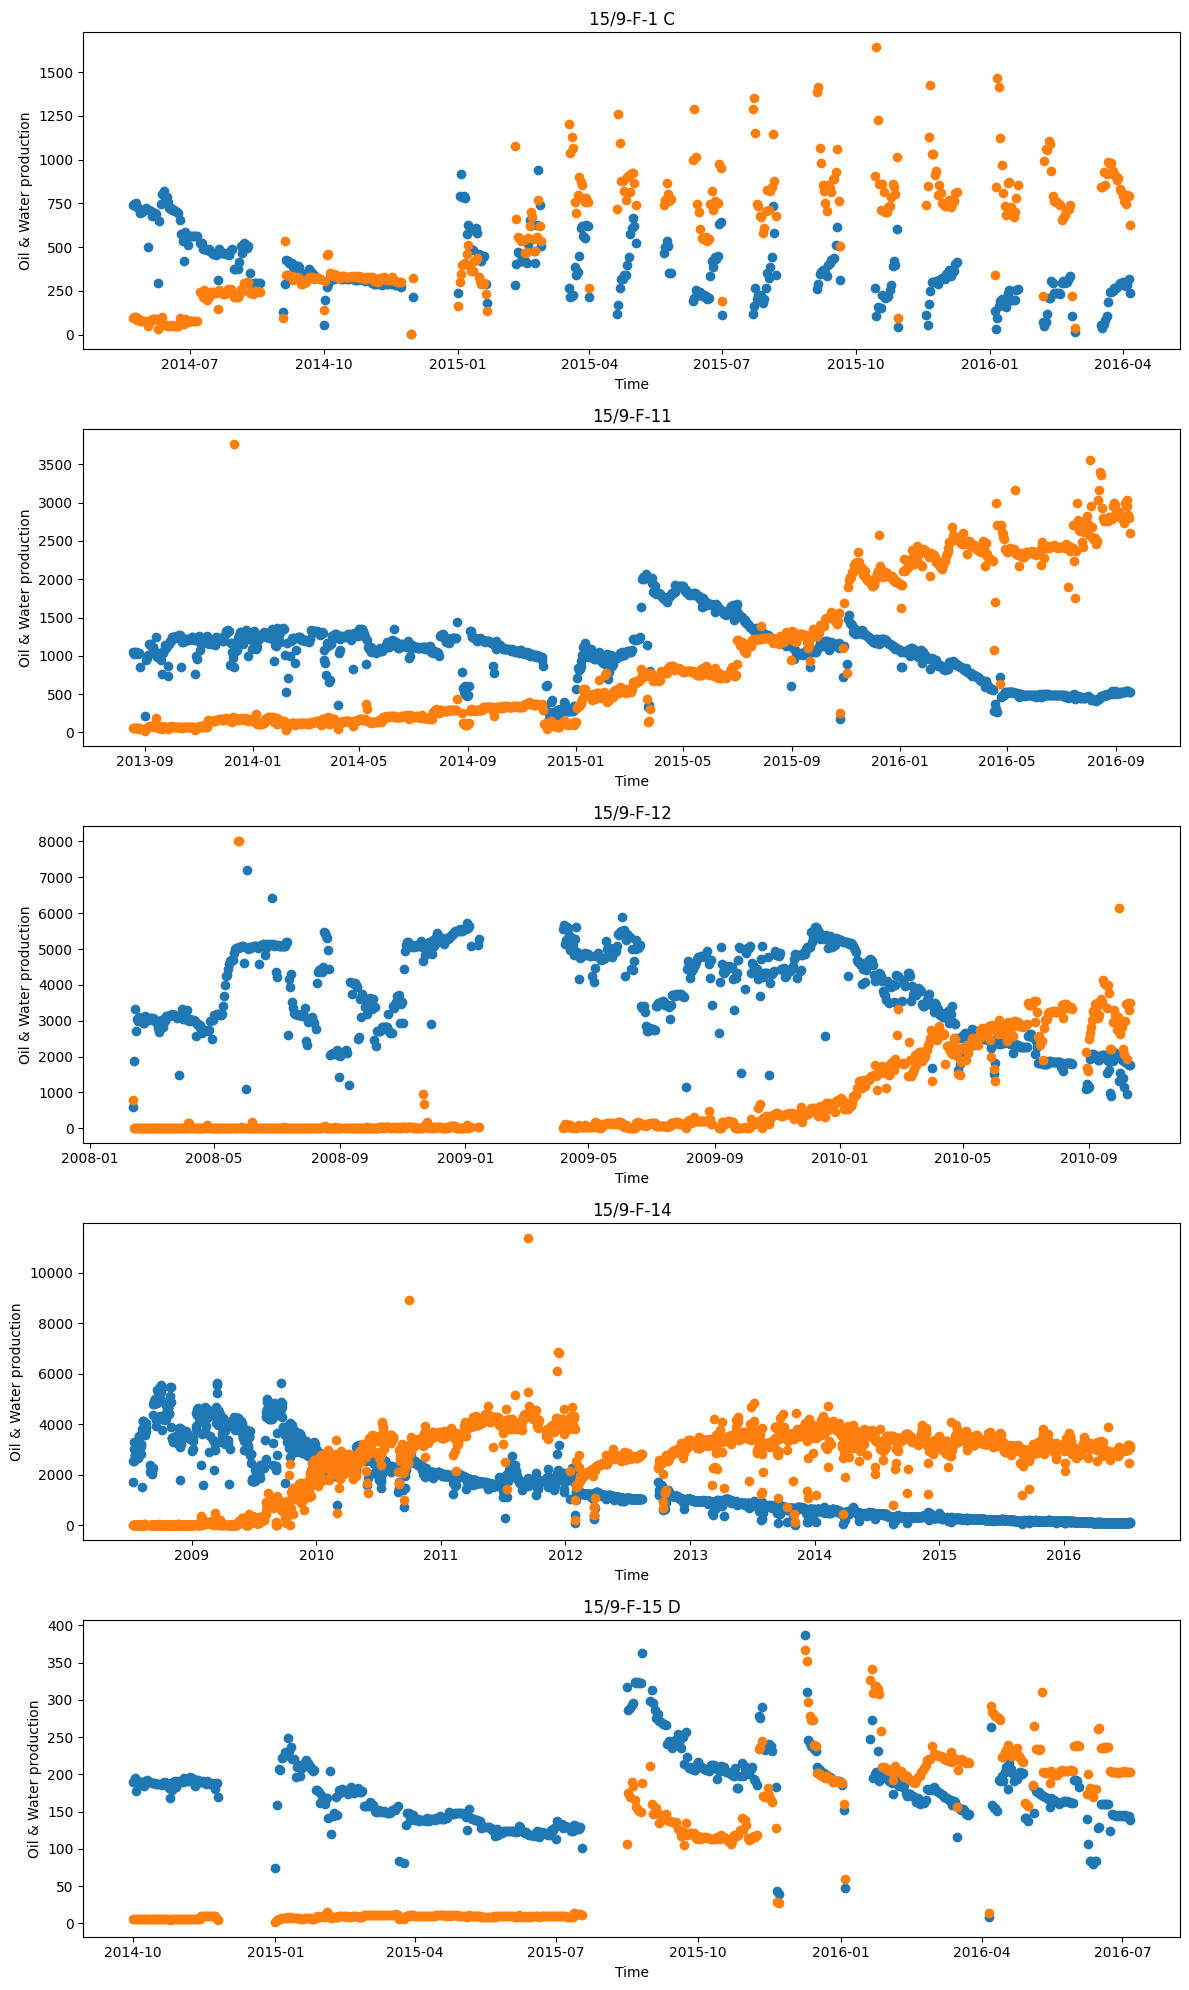

In [22]:
# Grafico de gasto de aceite y agua
wells = df_ml["well_name"].unique()
plt.figure(figsize=(12,20))
for i, well in enumerate(wells):
    d = df_ml[df_ml["well_name"]==well]
    plt.subplot(len(wells),1,i+1)
    plt.scatter(d["date"],d["oil_rate"])
    plt.scatter(d["date"],d["water_rate"])
    plt.title(well)
    plt.xlabel("Time")
    plt.ylabel("Oil & Water production")
    
plt.tight_layout()
plt.show

In [23]:
df_ML = df_ml.drop(['date', 'prod_hrs', 'gas_rate','gor','wc'], axis=1)
df_ML.head()

,well_name,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_rate,water_rate,num_of_days
46,15/9-F-1 C,219.862926,107.867219,155.572074,64.290852,49.052980,35.873077,742.89,93.31,2456
47,15/9-F-1 C,219.922991,107.882980,155.752739,64.170252,54.690688,35.750710,746.54,100.42,2457
48,15/9-F-1 C,219.977103,107.902788,155.904444,64.072658,55.231164,35.671313,750.57,101.01,2458
49,15/9-F-1 C,219.973775,107.920711,156.043395,63.930381,55.102528,35.528917,727.26,86.62,2459
50,15/9-F-1 C,219.980475,107.936462,156.243261,63.737214,55.311219,35.334838,715.50,91.08,2460


In [24]:
df_ML.groupby('well_name').count()

,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_rate,water_rate,num_of_days
well_name,,,,,,,,,
15/9-F-1 C,398,398,398,398,398,398,398,398,398
15/9-F-11,1098,1098,1098,1098,1098,1098,1098,1098,1098
15/9-F-12,848,848,848,848,848,848,848,848,848
15/9-F-14,2697,2697,2697,2697,2697,2697,2697,2697,2697
15/9-F-15 D,525,525,525,525,525,525,525,525,525


In [25]:
# Grafico de gasto de aceite y agua
wells = df_ML["well_name"].unique()
df_ML_train = pd.DataFrame(columns=list(df_ML.columns))
df_ML_test = pd.DataFrame(columns=list(df_ML.columns))

for i, well in enumerate(wells):
    d = df_ML[df_ML["well_name"]==well]
    train_size=  int(.9 * len(d))
    train = d.iloc[:train_size]
    test = d.iloc[train_size:]
    df_ML_train = pd.concat([df_ML_train, train], ignore_index=True)
    df_ML_test = pd.concat([df_ML_test, test], ignore_index=True)

X_train = df_ML_train.drop(['well_name','oil_rate', 'water_rate'], axis=1)
y_train = df_ML_train[['oil_rate', 'water_rate']]
X_test = df_ML_test.drop(['well_name','oil_rate', 'water_rate'], axis=1)
y_test = df_ML_test[['oil_rate', 'water_rate']]


C:\Users\fisher-admin\AppData\Local\Temp\ipykernel_23836\1746283615.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ML_train = pd.concat([df_ML_train, train], ignore_index=True)
C:\Users\fisher-admin\AppData\Local\Temp\ipykernel_23836\1746283615.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ML_test = pd.concat([df_ML_test, test], ignore_index=True)


In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5008, 7), (5008, 2), (558, 7), (558, 2))

In [27]:
X_train.head()

,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,num_of_days
0,219.862926,107.867219,155.572074,64.290852,49.052980,35.873077,2456
1,219.922991,107.882980,155.752739,64.170252,54.690688,35.750710,2457
2,219.977103,107.902788,155.904444,64.072658,55.231164,35.671313,2458
3,219.973775,107.920711,156.043395,63.930381,55.102528,35.528917,2459
4,219.980475,107.936462,156.243261,63.737214,55.311219,35.334838,2460


In [28]:
X_test.head()

,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,num_of_days
0,258.253813,108.055584,230.122735,28.131077,72.828645,12.387741,3083
1,251.451043,108.149480,220.047239,31.403804,78.309158,15.645335,3084
2,245.655402,108.179733,212.439634,33.215767,77.274947,17.429411,3085
3,241.079762,108.156339,207.775469,33.304294,74.487493,17.287176,3086
4,239.048122,108.069612,207.382103,31.666019,72.973538,15.687755,3087


In [29]:
y_train.head()

,oil_rate,water_rate
0,742.89,93.31
1,746.54,100.42
2,750.57,101.01
3,727.26,86.62
4,715.50,91.08


In [30]:
y_test.head()

,oil_rate,water_rate
0,118.71,1056.77
1,207.31,1108.05
2,210.23,1086.80
3,308.45,937.87
4,293.21,791.15


In [31]:
# Normalizar los datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


In [32]:

# Crear y entrenar el modelo de red neuronal
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train_scaled)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [33]:
# Hacer predicciones
y_test_pred_scaled = model.predict(X_test_scaled)

y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)



In [34]:
y_test_pred 

array([[  60.98257579, 1057.01217154],
       [ 247.66411204, 1212.81431693],
       [ 308.20130803, 1120.7687905 ],
       ...,
       [ 281.77937462,  481.58389897],
       [ 274.68511363,  483.0941036 ],
       [ 241.90365187,  418.16611481]])

In [35]:
y_test_Pred = pd.DataFrame(y_test_pred, columns=['oil_rate'	,'water_rate'])
y_test_Pred

,oil_rate,water_rate
0,60.982576,1057.012172
1,247.664112,1212.814317
2,308.201308,1120.768790
3,343.317722,1002.247770
4,330.276998,964.285938
...,...,...
553,249.783982,425.750314
554,249.538698,426.045527
555,281.779375,481.583899
556,274.685114,483.094104


In [36]:
df_ML_test[['well_name','num_of_days']],

(       well_name num_of_days
 0     15/9-F-1 C        3083
 1     15/9-F-1 C        3084
 2     15/9-F-1 C        3085
 3     15/9-F-1 C        3086
 4     15/9-F-1 C        3087
 ..           ...         ...
 553  15/9-F-15 D        3227
 554  15/9-F-15 D        3228
 555  15/9-F-15 D        3229
 556  15/9-F-15 D        3230
 557  15/9-F-15 D        3231
 
 [558 rows x 2 columns],)

In [37]:
y_test_Pred= pd.concat([df_ML_test[['well_name','num_of_days']], y_test_Pred], ignore_index=True, axis = 1)
y_test_Pred.columns = ['well_name', 'num_of_days', 'oil_rate', 'water_rate']
y_test_Pred

,well_name,num_of_days,oil_rate,water_rate
0,15/9-F-1 C,3083,60.982576,1057.012172
1,15/9-F-1 C,3084,247.664112,1212.814317
2,15/9-F-1 C,3085,308.201308,1120.768790
3,15/9-F-1 C,3086,343.317722,1002.247770
4,15/9-F-1 C,3087,330.276998,964.285938
...,...,...,...,...
553,15/9-F-15 D,3227,249.783982,425.750314
554,15/9-F-15 D,3228,249.538698,426.045527
555,15/9-F-15 D,3229,281.779375,481.583899
556,15/9-F-15 D,3230,274.685114,483.094104


In [38]:
#Evaluación
print("Test")
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
oil_mae = mean_absolute_error(y_test["oil_rate"],y_pred[:,0])
oil_r2 = r2_score(y_test["oil_rate"],y_pred[:,0])
water_mae = mean_absolute_error(y_test["water_rate"],y_pred[:,1])
water_r2 = r2_score(y_test["water_rate"],y_pred[:,1])
print(f" Oil MAE :{oil_mae} , R2 :{oil_r2}")
print(f" Water MAE :{water_mae} , R2 :{water_r2}")

print("Train")
y_train_pred_scaled = model.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
oil_mae = mean_absolute_error(y_train["oil_rate"],y_train_pred[:,0])
oil_r2 = r2_score(y_train["oil_rate"],y_train_pred[:,0])
water_mae = mean_absolute_error(y_train["water_rate"],y_train_pred[:,1])
water_r2 = r2_score(y_train["water_rate"],y_train_pred[:,1])
print(f" Oil MAE :{oil_mae} , R2 :{oil_r2}")
print(f" Water MAE :{water_mae} , R2 :{water_r2}")



Test
 Oil MAE :84.3312185941014 , R2 :0.9356037921625665
 Water MAE :242.2875589464342 , R2 :0.8810595758994623
Train
 Oil MAE :106.04090958322848 , R2 :0.9835971028201421
 Water MAE :136.55381859274584 , R2 :0.9587534900859574


<function matplotlib.pyplot.show(close=None, block=None)>

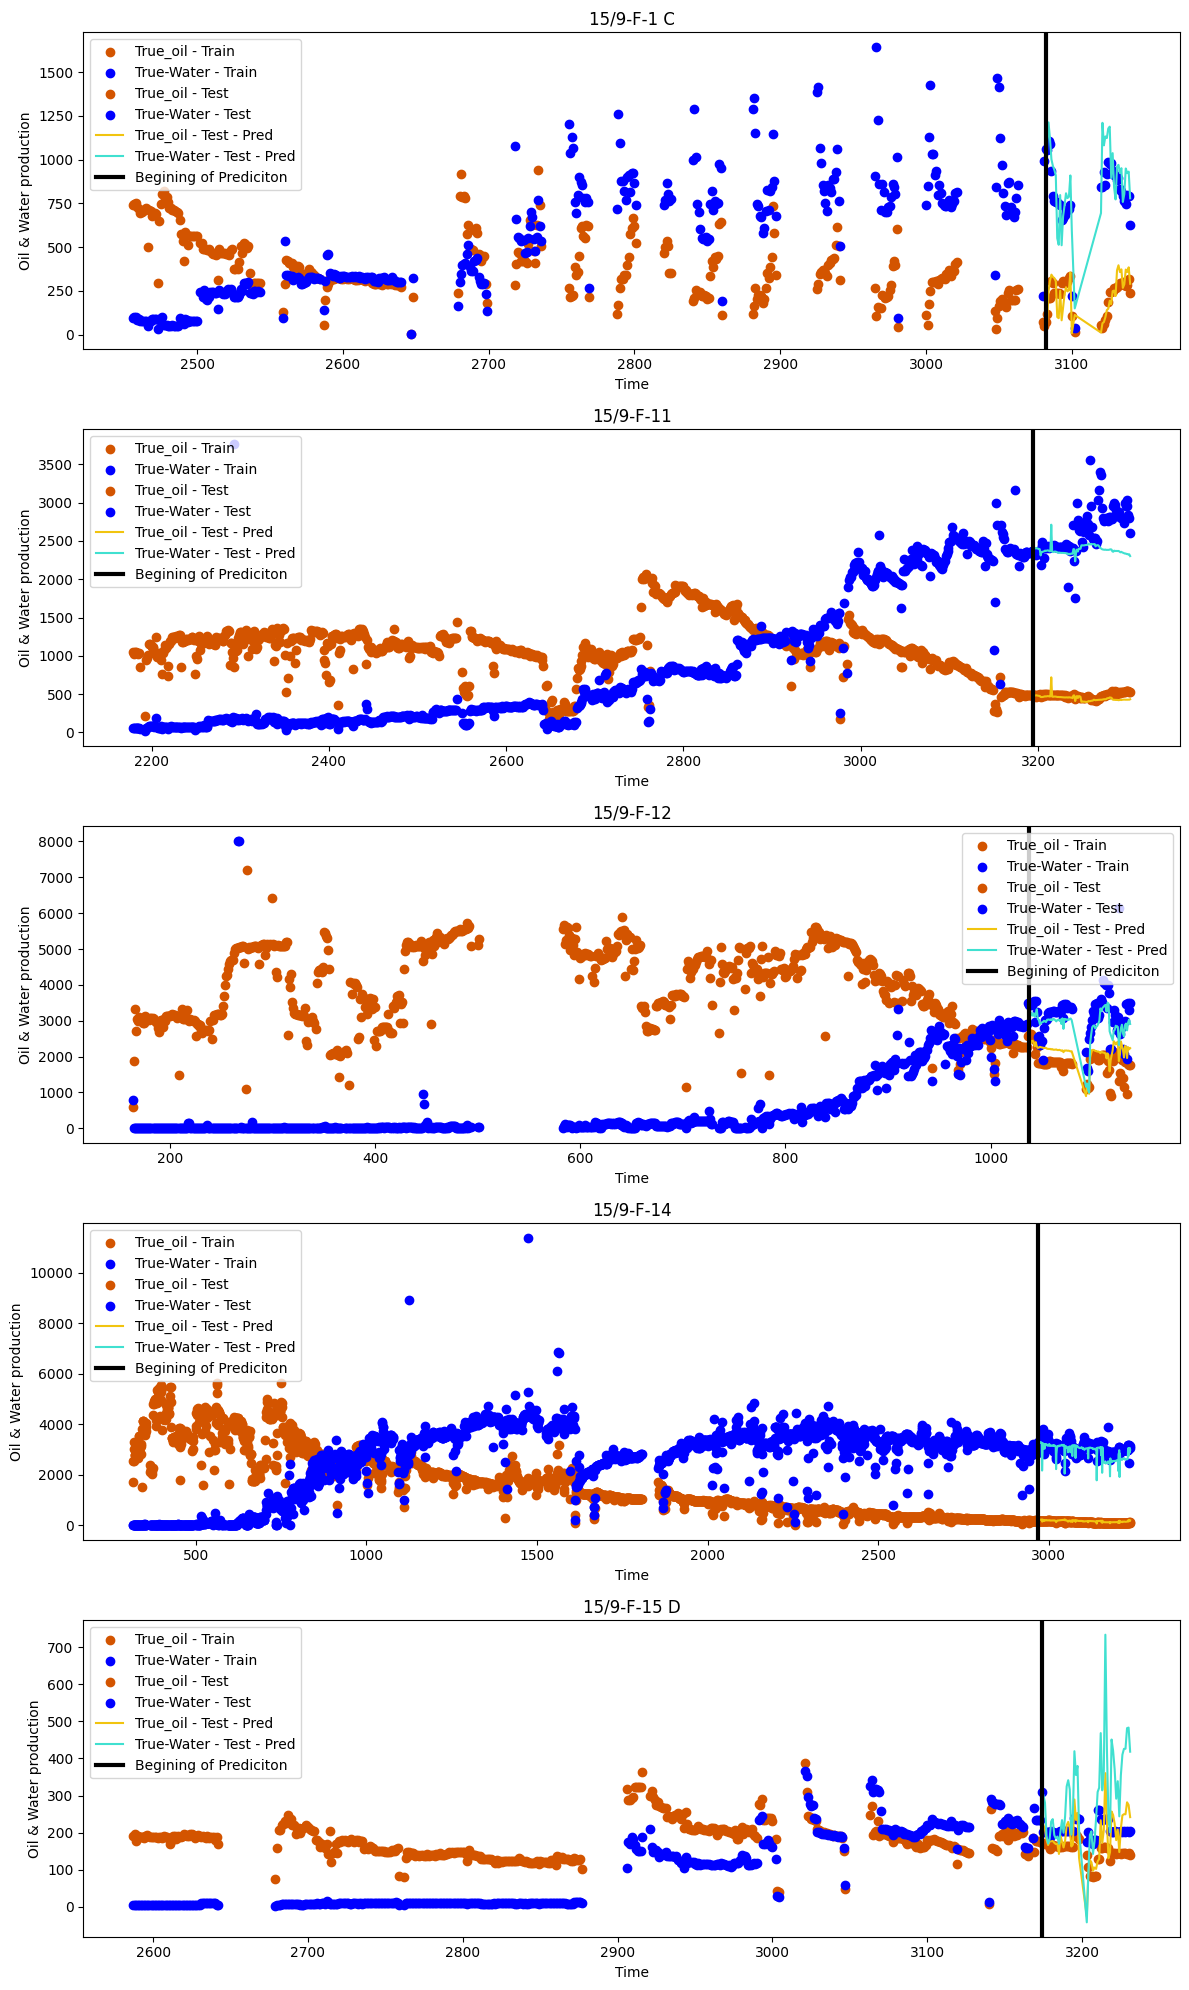

In [39]:
#plt.style.use("ggplot")
#plt.figure(figsize=(10,6))
#plt.title("Show model results",fontsize=20,pad=40)

#plt.plot(X_test["days"],y_pred_oil,color="#F1C40F",label="oil_prdiction")
#plt.plot(X_test["days"],y_pred_water,color="#40E0D0",label="water_prediction")
#plt.plot(X_train["days"],y_train["oil_rate"],color="#D35400")
#plt.plot(X_train["days"],y_train["water_rate"],color="blue")
#plt.plot(X_test["days"],y_test["oil_rate"],color="#D35400",label="True_oil")
#plt.plot(X_test["days"],y_test["water_rate"],color="blue",label="True-Water")
#plt.axvline(x = X["days"].iloc[train_size], color = '#fff',linewidth=3, label = 'Begining of Prediciton');
#plt.legend();


# Grafico de gasto de aceite y agua
wells = df_ML_train["well_name"].unique()
plt.figure(figsize=(12,20))
for i, well in enumerate(wells):
    d = df_ML_train[df_ML_train["well_name"]==well]
    dt = df_ML_test[df_ML_test["well_name"]==well]
    dtp = y_test_Pred[y_test_Pred["well_name"]==well]
    
    plt.subplot(len(wells),1,i+1)
    plt.scatter(d["num_of_days"],d["oil_rate"],color="#D35400",label="True_oil - Train")
    plt.scatter(d["num_of_days"],d["water_rate"],color="blue",label="True-Water - Train")
    plt.scatter(dt["num_of_days"],dt["oil_rate"],color="#D35400",label="True_oil - Test")
    plt.scatter(dt["num_of_days"],dt["water_rate"],color="blue",label="True-Water - Test")
    plt.plot(dtp["num_of_days"],dtp["oil_rate"],color="#F1C40F",label="True_oil - Test - Pred")
    plt.plot(dtp["num_of_days"],dtp["water_rate"],color="#40E0D0",label="True-Water - Test - Pred")
    plt.axvline(x = d["num_of_days"].max(), color = 'black',linewidth=3, label = 'Begining of Prediciton');
    plt.title(well)
    plt.xlabel("Time")
    plt.ylabel("Oil & Water production")
    plt.legend();
    
plt.tight_layout()
plt.show